Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/06/23


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import sklearn
import spacy
import re
import gensim

from gensim.models import word2vec
from nltk.corpus import gutenberg, stopwords
from sklearn.decomposition import TruncatedSVD

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

# Unsupervised Neural Network: word2vec



In [2]:
# Utility function to clean text.
def text_cleaner(text):
    
    # Visual inspection shows spaCy does not recognize the double dash '--'.
    # Better get rid of it now!
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in square brackets.
    text = re.sub("[\[].*?[\]]", "", text)
    
    # Get rid of chapter titles.
    text = re.sub(r'Chapter \d+','',text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text


# Import all the Austen in the Project Gutenberg corpus.
austen = ""
for novel in ['persuasion','emma','sense']:
    work = gutenberg.raw('austen-' + novel + '.txt')
    austen = austen + work

# Clean the data.
austen_clean = text_cleaner(austen)

In [3]:
# Parse the data. This can take some time.
nlp = spacy.load('en')
austen_doc = nlp(austen_clean)

In [4]:
# Organize the parsed doc into sentences, while filtering out punctuation
# and stop words, and converting words to lower case lemmas.
sentences = []
for sentence in austen_doc.sents:
    sentence = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences.append(sentence)


print('We have {} sentences and {} tokens.'.format(len(sentences), len(austen_clean)))

We have 15735 sentences and 2006272 tokens.


### Initiate Neural Network Model

In [5]:
model = word2vec.Word2Vec(
    sentences,
    workers=2,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=10,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

print('done!')

done!


dict_keys(['couple', 'continual', 'jump', 'striking', 'success', 'emotion', 'prefer', 'company', 'bid', 'surround', 'boast', 'politeness', 'cure', 'render', 'kindly', 'morton', 'release', 'despair', 'ceremony', 'attach', 'constancy', 'like', 'increase', 'creature', 'absolutely', 'shame', 'pardon', 'english', 'comfortable', 'disappoint', 'oh', 'certainly', 'manage', 'disposed', 'grandmama', 'chamber', 'call', 'ne', 'ring', 'sake', 'anne', 'interest', 'heir', 'daughter', 'apply', 'condition', 'affliction', 'obliging', 'blunder', 'quickness', 'papa', 'check', 'guard', 'sell', 'trial', 'weak', 'extraordinary', 'spoil', 'prove', 'sensible', 'mark', 'seven', 'careful', 'intimate', 'surprised', 'continually', 'walk', 'possible', 'hesitate', 'near', 'care', 'agitated', 'sorrow', 'deep', 'able', 'equal', 'doubtful', 'soften', 'influence', 'volume', 'spirit', 'steady', 'spite', 'syllable', 'impatience', 'honourable', 'possess', 'jealousy', 'usual', 'din', 'lyme', 'convenient', 'shut', 'lament', 

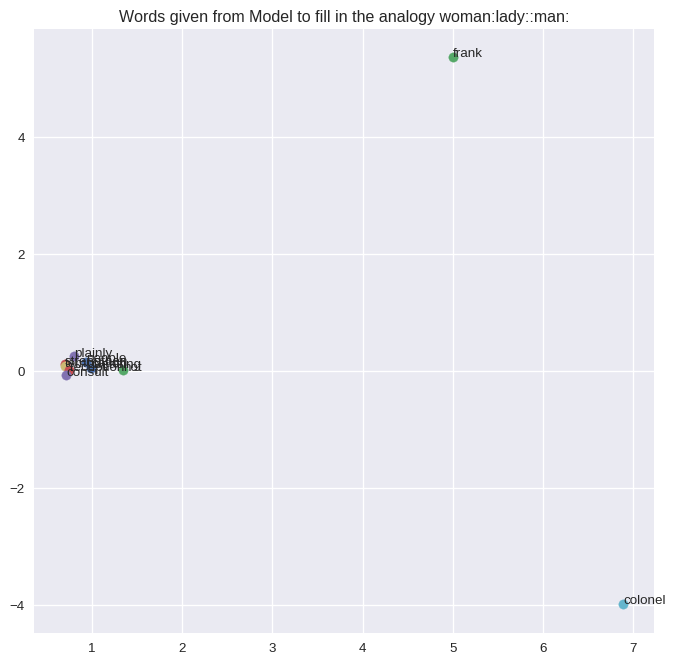

In [6]:
# List of words in model.
vocab = model.wv.vocab.keys()
print(vocab)

print(model.wv.most_similar(positive=['lady', 'man'], negative=['woman']))
print('\n')

# Similarity is calculated using the cosine, so again 1 is total
# simlarity and 0 is no similarity.
print(model.wv.similarity('loud', 'aloud'))
print(model.wv.similarity('mr', 'mrs'))
print('\n')
# One of these things is not like the other...
print(model.doesnt_match("breakfast marriage dinner lunch".split()))
print('\n')

# let us plot the similarity values of most similar to lady, man
item_sim_values_list = model.wv.most_similar(positive=['lady', 'man'], negative=['woman'])
word_list = []
vector_list = []

for item in item_sim_values_list:
    word_list.append(item[0])
    vector_list.append(model[item[0]])
    
    
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(vector_list)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.title("Words given from Model to fill in the analogy woman:lady::man:")
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(word_list[i], (xs[i], ys[i]))



## Drill 0
Take a few minutes to modify the hyperparameters of this model and see how its answers change. Can you wrangle any improvements?

### Initiate Neural Network Model

In [7]:
model = word2vec.Word2Vec(
    sentences,
    workers=2,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=11,  # Minimum word count threshold.
    window=9,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)


Standard Deviation of similarity scores:  0.04



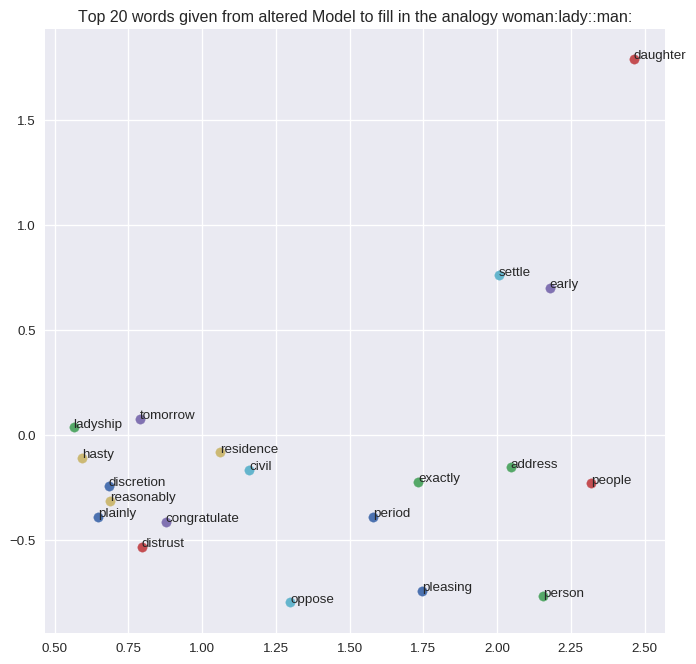

In [10]:
# let us plot the similarity values of most similar to lady, man
item_sim_values_list = model.wv.most_similar(positive=['lady', 'man'], negative=['woman'],  topn=20)
word_list = []
vector_list = []
sim_scores = []

for item in item_sim_values_list:
    word_list.append(item[0])
    vector_list.append(model[item[0]])
    sim_scores.append(item[1])
    

print('\nStandard Deviation of similarity scores: % .2f\n' % (np.std(sim_scores)))    

lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(vector_list)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.title("Top 20 words given from altered Model to fill in the analogy woman:lady::man:")
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(word_list[i], (xs[i], ys[i]))

## Drill 1 : Word2Vec on 100B+ words


In [13]:
# Load Google's pre-trained Word2Vec model.
path = '/media/ianh/space/ThinkfulData/NLP_Word2Vec_Model/freebase-vectors-skipgram1000-en.bin'
model = gensim.models.KeyedVectors.load_word2vec_format (path, binary=True)

In [14]:
# Let us try the same analogy fro Jane Austen's worls above.
# let us plot the similarity values of most similar to lady, man
item_sim_values_list = model.wv.most_similar(positive=['lady', 'man'], negative=['woman'], topn=2)
word_list = []
vector_list = []
sim_scores.clear()

for item in item_sim_values_list:
    word_list.append(item[0])
    vector_list.append(model[item[0]])
    sim_scores.append(item[1])
    
print('\nStandard Deviation of similarity scores: % .2f\n' % (np.std(sim_scores))) 
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(vector_list)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.title("Model with 100 Billion words - analogy woman:lady::man:")
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(word_list[i], (xs[i], ys[i]))

MemoryError: 

 Result of online tool : lady is to Women as Man is to?
 
 208.9ms [["men",0.7666277885437012],["Men",0.5138857364654541],["males",0.4883289933204651],["teenagers",0.48271918296813965],["woman",0.47852250933647156]] 
 
 Result of similair words to 'Trump'
 
  191.7ms [["Donald_Trump",0.8103920221328735],["impersonator_entertained",0.5942256450653076],["Ivanka_Trump",0.5924582481384277],["Ivanka",0.560720682144165],["mogul_Donald_Trump",0.5592452883720398]] 
  

Result of similair words to 'Pancakes'

 169.3ms [["flapjacks",0.7197023630142212],["blueberry_pancakes",0.7123627662658691],["waffles",0.6958189010620117],["omelets",0.6940463781356812],["crepes",0.6798824071884155]] 
 
 
Result of which of these not the same: cake, studel, tart, loaf

2.6 ms tart

Result of which of these is not the same: buck, greenback, dollar, loonie

2.1 ms buck

## Discussion
The Word2Vec model parameters minimum count of words and window had the largest change in outcome for the analogy results.  The results are depicted in two plots. The first plot is the model instance constructed with original notebook parameters. The second plot are the results with a new model instance created with the above-mentioned parameters altered.  The plots reveal how similar the terms are to each other and used to more easily visualize the outcome.  As can be seen the model with such small number of number of terms in a corpus does rather poor job of completing the analogy; ‘lady is to women as man is to?’. The word men does not appear in the top twenty responses.

Due to the limited amount of RAM on my virtual machine I was unable to run Google’ pretrained model. What is shown are the results for several word similarity queries and analogy completions with the online tool for the Freebase Names model with a corpus of over a billion items.  Interestingly similar words to Pancakes and Trump were “omelets” and “impersonator entertained”. 

